Регрессия – это зависимость среднего значения какой-либо величины от некоторой другой величины или от нескольких других величин. В отличие от чисто функциональной зависимости y=f(x), когда каждому значению независимой переменной x соответствует одно определённое значение зависимой переменной у, при регрессионной связи одному и тому же значению независимой переменной (фактору) x могут соответствовать в зависимости от конкретного случая различные значения зависимой переменной (отклика) у.

Изучение регрессии основано на том, что случайные величины Х и Y связаны между собой вероятностной зависимостью: при каждом конкретном значении X=x величина Y является случайной величиной с вполне определённым распределением вероятностей. Зависимость зависимой переменной – отклика от одной независимой переменной – фактора или нескольких факторов называется уравнением регрессии. По количеству факторов выделяют парную (однофакторную) и множественную (многофакторную) регрессию. Для парной будем рассматривать следующие методы регрессии: линейную, показательную, экспоненциальную, гиперболическую и параболическую.

Регрессионный анализ – это раздел математической статистики, изучающий регрессионную зависимость между случайными величинами по статистическим данным. Цель регрессионного анализа состоит в определении общего вида уравнения регрессии, вычислении оценок неизвестных параметров, входящих в уравнение регрессии проверке статистических гипотез о регрессионной связи.

Таким образом, регрессионный анализ – набор статистических методов исследования влияния одной или нескольких независимых переменных X1,…,Xn на зависимую переменную Y. Независимые переменные иначе называют регрессорами или предикторами, а зависимые переменные – критериальными переменными.

## Линейная регрессия
Линейная регрессия (Linear regression) – модель зависимости переменной x от одной или нескольких других переменных (факторов, регрессоров, независимых переменных) с линейной функцией зависимости. Линейная регрессия относится к задаче определения «линии наилучшего соответствия» через набор точек данных и стала простым предшественником нелинейных методов, которые используют для обучения нейронных сетей.

Цель линейной регрессии — поиск линии, которая наилучшим образом соответствует этим точкам. Напомним, что общее уравнение для прямой есть 
f (x) = b +mx, где m – наклон линии, а b – его сдвиг.

## Функция потерь — метод наименьших квадратов
Функция потерь – это мера количества ошибок, которые наша линейная регрессия делает на наборе данных. Хотя есть разные функции потерь, все они вычисляют расстояние между предсказанным значением y(х) и его фактическим значением.
Одна очень распространенная функция потерь называется средней квадратичной ошибкой MSE. Чтобы вычислить MSE, мы просто берем все значения ошибок, считаем их квадраты длин и усредняем.

## Задача экстраполяции

Допустим у нас есть много экспериментальных точек. Необходимо через них провести кривую, которая как можно ближе проходила к этим точкам. При этом необходимо минимизировать среднюю квадратичную ошибку (MSE).
Для решения данной задачи в Python есть множество библиотек. Самыми распространенными выступают:

numpy - numpy.linalg.lstsq
scipy - scipy.linalg (содержит все функции из numpy.linalg плюс часть новых функций, которых нет в numpy.linalg).

1.1.1 Пример
Проведем прямую y = mx + b  через экспериментальные точки.

In [1]:
import numpy as np 
x = np.array([0, 1, 2, 3])
y = np.array([-1, 0.2, 0.9, 2.1])

A = np.vstack([x, np.ones(len(x))]).T
A

array([[0., 1.],
       [1., 1.],
       [2., 1.],
       [3., 1.]])

In [2]:
m, c = np.linalg.lstsq(A, y, rcond = None)[0]
print(m, c)

0.9999999999999999 -0.9499999999999995


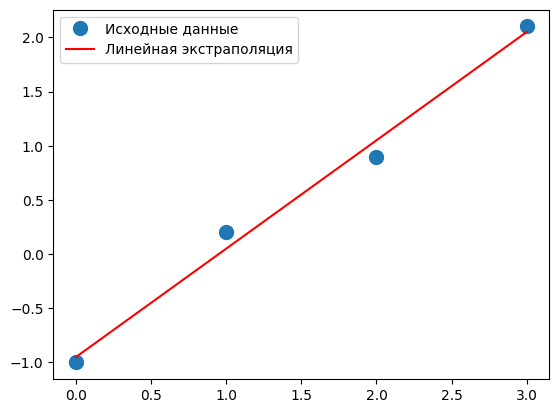

In [4]:
import matplotlib.pyplot as plt
plt.plot(x, y, 'o', label='Исходные данные', markersize=10)
plt.plot(x, m*x+c, 'r', label='Линейная экстраполяция')
plt.legend()
plt.show()